# Flight Prices Project

The dataset used for this project is from Kaggle. Link: https://www.kaggle.com/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

In [1]:
import numpy as np
import pandas as pd

Import Data Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Read in the csv file as a dataframe called df 

In [3]:
df = pd.read_csv('flight_price_clean_data.csv')

Check the info() of the df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Check the head of df 

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


1) Does price vary with Airlines?
*code for labels https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

[Text(0, 0, '6179.28'),
 Text(0, 0, '4091.07'),
 Text(0, 0, '30396.5'),
 Text(0, 0, '5652.01'),
 Text(0, 0, '5324.22'),
 Text(0, 0, '23507')]

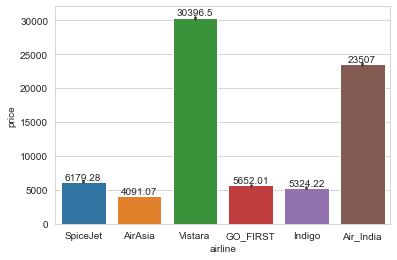

In [6]:
ax = sns.barplot(x='airline',y='price', data=df)
ax.bar_label(ax.containers[0])

Looking at the plot above, it appears that price varies with airline. Vistara appears to have the highest prices followed by Air_India, SpiceJet, GO_First, Indigo, and lastly AirAsia.

2) How is the price affected when tickets are bought in just 1 or 2 days before departure?

Thought Process:
    y-axis = price, x-axis = days, but have days increase from 0,1,2, up to the highest possible 
    plot a different color line for each airline

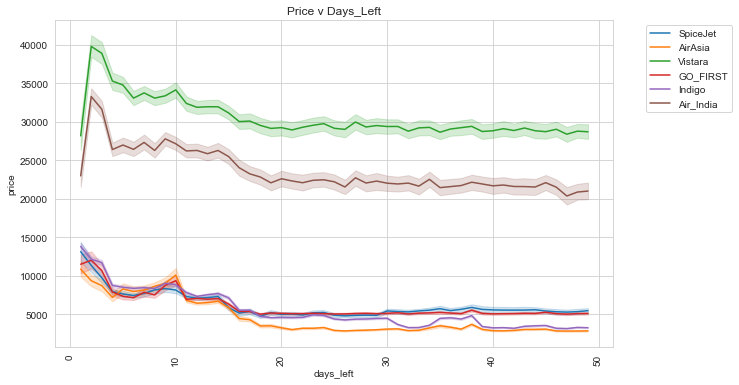

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=df, hue='airline').set(title='Price v Days_Left')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Looking at this intial plot, it appears that there is an increase in prices for airline tickets as the days decrease for AirAsia, GO_First, Indigo, and SpiceJet. 
For Vistara and Air_India there is an increase and then sudden drop in prices as the days left approach zero. 

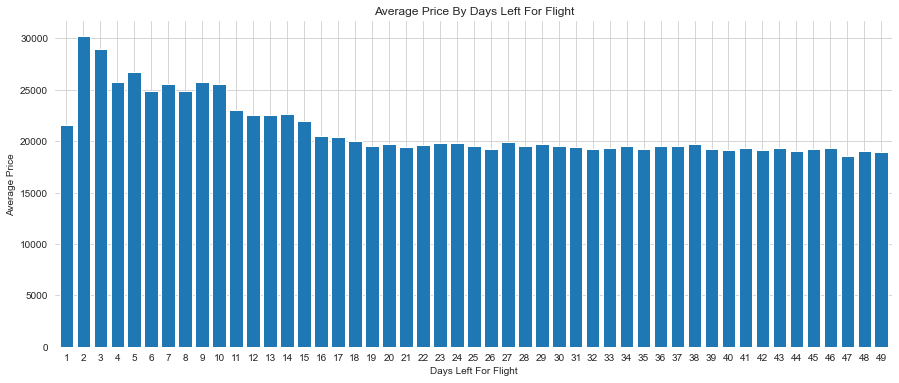

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['days_left'])['price'].mean().plot(kind = 'bar', width= 0.8)#, color = (0.99,0.82,0.011),  edgecolor = (0.98,0.66,0.01))
ax.set(title = "Average Price By Days Left For Flight",
       xlabel = "Days Left For Flight",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

Based on the plot above, we can see that as the days left for the flight approach 2 the average price for a ticket is at its highest, and then by day 1 the average price drops by roughly 29%. 

3) Does ticket price change based on the departure time and arrival time?

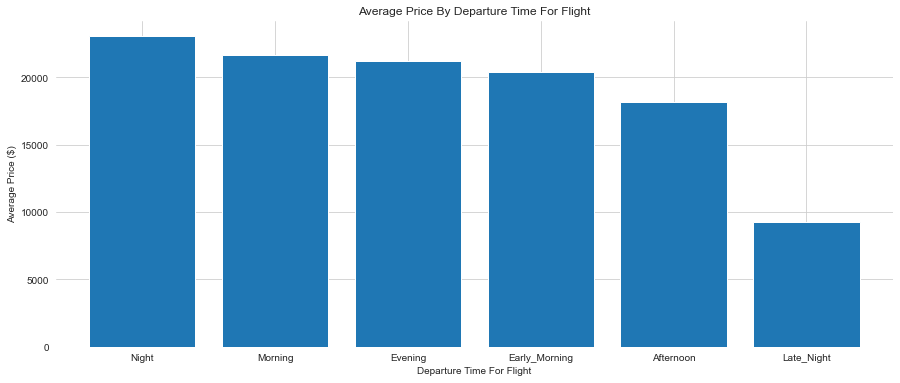

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['departure_time'])['price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8)#, color = (0.99,0.82,0.011),  edgecolor = (0.98,0.66,0.01))
ax.set(title = "Average Price By Departure Time For Flight",
       xlabel = "Departure Time For Flight",
       ylabel = "Average Price ($)")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

For departure time, it appears that ticket price varies depending on the time. 

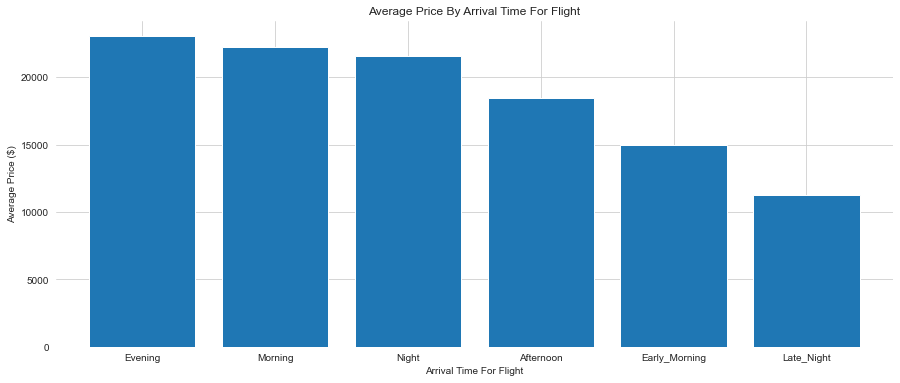

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8)#, color = (0.99,0.82,0.011),  edgecolor = (0.98,0.66,0.01))
ax.set(title = "Average Price By Arrival Time For Flight",
       xlabel = "Arrival Time For Flight",
       ylabel = "Average Price ($)")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

Similar to departure time, for arrival time, ticket prices vary depending on the time. 

4) How the price changes with change in Source and Destination?

Thought Process
[plot 1]: y-axis = price, x-axis = source
[plot 2]: y-axis = price, x-axis = destination


[Text(0, 0, '18951.3'),
 Text(0, 0, '21483.8'),
 Text(0, 0, '21469.5'),
 Text(0, 0, '21746.2'),
 Text(0, 0, '20155.6'),
 Text(0, 0, '21995.3')]

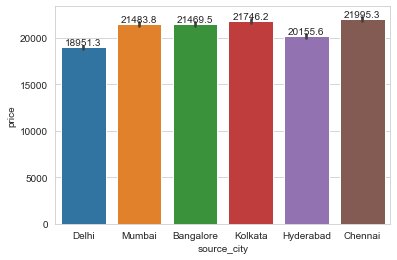

In [11]:
ax1 = sns.barplot(x='source_city',y='price', data=df)
ax1.bar_label(ax1.containers[0])

For sources, the change in prices are pretty negligible with noticeable differences in prices for Hyderabad and Delhi.

[Text(0, 0, '21372.5'),
 Text(0, 0, '21594'),
 Text(0, 0, '21959.6'),
 Text(0, 0, '20427.7'),
 Text(0, 0, '21953.3'),
 Text(0, 0, '18436.8')]

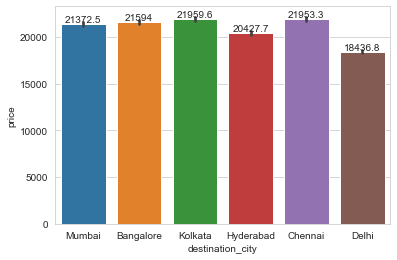

In [12]:
ax2 = sns.barplot(x='destination_city',y='price', data=df)
ax2.bar_label(ax2.containers[0])

For destinations, the change in prices is pretty negligible with noticeable differences in prices for Hyderabad and Delhi as well. 

5) How does the ticket price vary between Economy and Business class?

[Text(0, 0, '6572.34'), Text(0, 0, '52540.1')]

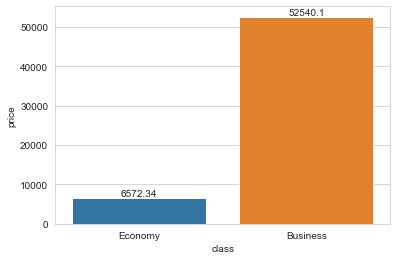

In [14]:
ax3 = sns.barplot(x='class',y='price', data=df)
ax3.bar_label(ax3.containers[0])

Perform 2 sampled t-test

Change data from long to wide

In [84]:
df5=df.pivot(columns='class', values='price')
df5

class,Business,Economy
0,NaN,5953.0
1,NaN,5953.0
2,NaN,5956.0
3,NaN,5955.0
4,NaN,5955.0
...,...,...
300148,69265.0,NaN
300149,77105.0,NaN
300150,79099.0,NaN
300151,81585.0,NaN


Check assumptions for t-test
1) normality
2) equal variance

array([[<AxesSubplot:title={'center':'Business'}>]], dtype=object)

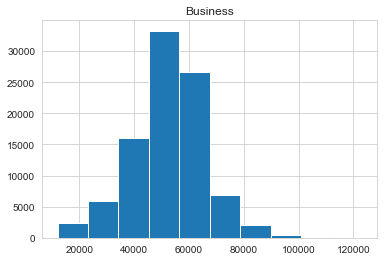

In [85]:
df5.hist(column='Business')

array([[<AxesSubplot:title={'center':'Economy'}>]], dtype=object)

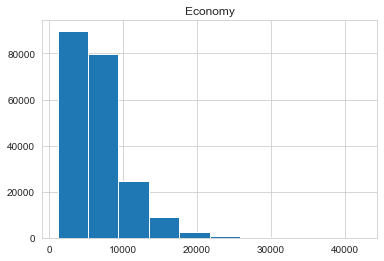

In [86]:
df5.hist(column='Economy')

Since the distributions are not normal, this tells me that we can't perform a t-test. This means we need to use mann whitney u since it is nonparametric. 

In [92]:
df5['Business'] = df5['Business'].fillna(0)
df5['Economy'] = df5['Economy'].fillna(0)

In [93]:
from scipy.stats import mannwhitneyu
results = mannwhitneyu(df5['Business'], df5['Economy'])
results

MannwhitneyuResult(statistic=37714461050.5, pvalue=0.0)

Since the pvalue is less than 0.05, there is evidence that the prices for Business class are different from Economy.